# 1. Perkenalan

## Milestone 2 Phase 2
----------------------------------------------------------------
Ardiansyah Arya Salvinia | Batch RMT-016

Dataset Overview : Dataset ini berisi judul berita, isi berita, subject dari berita dan tanggal pengunggahan berita tersebut. Dipisahkan menjadi 2 jenis yaitu berita asli dan berita palsu.

Problem statement : Pemerintah amerika membutuhkan model machine learning untuk membantu filtering berita palsu/hoax karena sedang banyak sekali serangan politik dari negara luar mengenai presiden dan pemerintahan periode ini. Tim data scientist ditugaskan untuk membuat model klasifikasi yang dapat memprediksi apakah berita tersebut asli atau palsu untuk menjaga kredibilitas pemerintahan. 

Objective: Dari dataset diatas penulis harus bisa menghasilkan model yang mampu memprediksi bahwa berita yang diprediksi adalah berita asli atau palsu menggunakan model NLP.

# 2. Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re 
import seaborn as sns
import tensorflow as tf
from google.colab import drive
from keras.models import load_model
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.layers import TextVectorization, Embedding, LSTM, Dropout, Dense
from tensorflow.keras import Model, Sequential
from wordcloud import WordCloud, STOPWORDS

# Memuat google drive
drive.mount('/content/gdrive')
nltk.download('all') # Melakukan download libraries nltk



Mounted at /content/gdrive


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

# 3. Data Loading

In [3]:
# Memuat dataset

true = pd.read_csv('/content/gdrive/MyDrive/Milestone 2/True.csv')
fake = pd.read_csv('/content/gdrive/MyDrive/Milestone 2/Fake.csv')

In [4]:
# Melihat 10 data berita yang asli

true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [5]:
# Melihat 10 data terakhir berita asli
true.tail(10)

,title,text,subject,date
21407,"Mata Pires, owner of embattled Brazil builder ...","SAO PAULO (Reuters) - Cesar Mata Pires, the ow...",worldnews,"August 22, 2017"
21408,"U.S., North Korea clash at U.N. forum over nuc...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21409,"U.S., North Korea clash at U.N. arms forum on ...",GENEVA (Reuters) - North Korea and the United ...,worldnews,"August 22, 2017"
21410,Headless torso could belong to submarine journ...,COPENHAGEN (Reuters) - Danish police said on T...,worldnews,"August 22, 2017"
21411,North Korea shipments to Syria chemical arms a...,UNITED NATIONS (Reuters) - Two North Korean sh...,worldnews,"August 21, 2017"
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"
21416,Indonesia to buy $1.14 billion worth of Russia...,JAKARTA (Reuters) - Indonesia will buy 11 Sukh...,worldnews,"August 22, 2017"


In [6]:
# Melihat 10 data awal berita palsu
fake.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


In [7]:
# Melihat 10 data akhir berita palsu
fake.tail(10)

,title,text,subject,date
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016"
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016"
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016"
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016"
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016"
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016"


Data sudah masuk ke variable, selanjutnya akan ditambahkan label yang akan menandakan berita itu palsu atau tidak sebelum dataset digabungkan.

In [8]:
# Menambahkan label classification 
true['label']=1
fake['label']=0

# Melihat data true
true


,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [9]:
# Melihat data fake
fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


Data sudah terjabarkan klasifikasinya, selanjutnya data akan digabungkan dalam 1 dataframe.

In [10]:
# Menyatukan menjadi 1 dataframe
df = pd.concat([true, fake])
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


Ternyata setelah digabungkan index nya masih mengikuti dataset awalnya, oleh karena itu akan dilakukan reset index.

In [11]:
# Melakukan reset index
df.reset_index(drop=True, inplace=True)
df

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


Index sudah sesuai dengan jumlah data, selanjutnya akan dilakukan proses EDA.

# 4. EDA

Penulis akan melakukan Exploratory data analisis pada jenis kolom, apakah kolom tersebut kira kira akan memiliki peran dalam penentuan bahwa berita itu palsu atau tidak, untuk perubahan dan penghapusan kolom akan dilakukan pada preprocessing, EDA hanya melihat dan mendeteksi saja.

In [12]:
# Melihat jenis kolom pada dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object
 2   subject  44898 non-null  object
 3   date     44898 non-null  object
 4   label    44898 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


Dataset berisi data kategorikal dan kemungkinan besar feature yang akan digunakan untuk memprediksi adalah title, subject dan text. Target adalah label yang menandakan berita tersebut adalah palsu atau asli. Selanjutnya melihay distribusi dari label apakah dataset imbalance atau tidak.

Jumlah Label

0    23481
1    21417
Name: label, dtype: int64


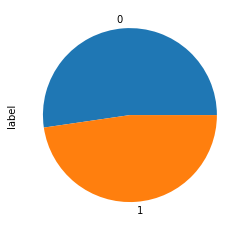

In [13]:
# Melihat distribusi label
df['label'].value_counts().plot(kind='pie')
print('Jumlah Label')
print('')
print(df['label'].value_counts())

Data tidak terlalu imbalance hanya berbeda kurang lebih 2000 data. Selanjutnya akan dilakukan pengecekan apakah ada nilai null atau tidak.

In [14]:
# Melakukan pengecekan nilai null
df.isna().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

Ternyata tidak ada nilai null. Selanjutnya akan dilakukan plotting pada data subject untuk melihat distribusi subject pada berita palsu atau asli.

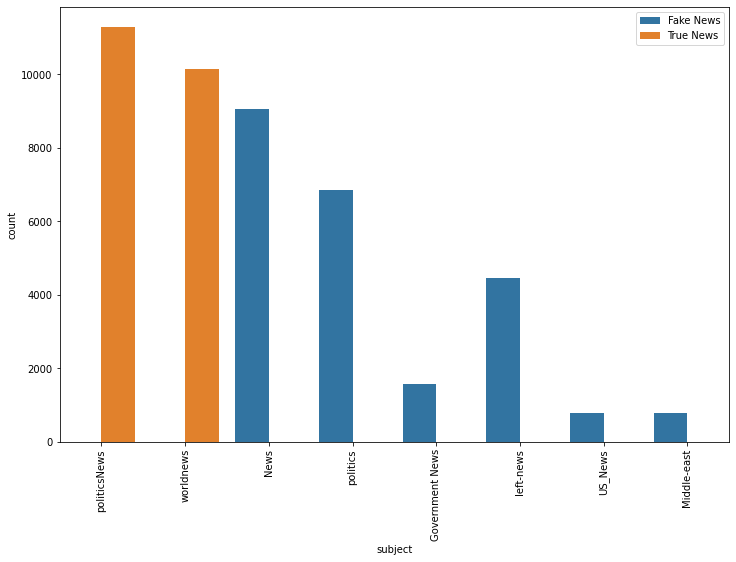

In [15]:
# Membuat plotting `subject` dengan bantuan countplot

plt.figure(figsize = (12,8))
chart = sns.countplot(x = "subject", hue = "label" , data = df)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
chart.legend( labels=['Fake News', 'True News'])

Subject tidak ada korelasi antara berita asli dan palsu, kalau dimasukan ke model, label terprediksi dengan akurat oleh karena itu akan penulis drop di pre-processing. Selanjutnya akan dilihat distribusi jumlah berita palsu dan berita asli tergantung pada tanggal.

In [16]:
# Melihat data date yang di groupby
date = df.groupby(['label','date','subject'], as_index=False)['subject'].count()
date

,label,date,subject
0,0,14-Feb-18,1
1,0,15-Feb-18,9
2,0,16-Feb-18,8
3,0,17-Feb-18,7
4,0,18-Feb-18,7
...,...,...,...
5207,1,"September 8, 2017",19
5208,1,"September 8, 2017",100
5209,1,"September 9, 2016",8
5210,1,"September 9, 2017",1


Ternyata data date terdapat format penulisan yang berbeda beda, penulis akan melihat beberapa artikel dan melakukan judgement apakah tanggal artikel akan menentukan apakah korelasi dengan palsunya berita.

In [17]:
# Melihat berita palsu
fake.text[3]

'On Christmas day, Donald Trump announced that he would  be back to work  the following day, but he is golfing for the fourth day in a row. The former reality show star blasted former President Barack Obama for playing golf and now Trump is on track to outpace the number of golf games his predecessor played.Updated my tracker of Trump s appearances at Trump properties.71 rounds of golf including today s. At this pace, he ll pass Obama s first-term total by July 24 next year. https://t.co/Fg7VacxRtJ pic.twitter.com/5gEMcjQTbH  Philip Bump (@pbump) December 29, 2017 That makes what a Washington Post reporter discovered on Trump s website really weird, but everything about this administration is bizarre AF. The coding contained a reference to Obama and golf:  Unlike Obama, we are working to fix the problem   and not on the golf course.  However, the coding wasn t done correctly.The website of Donald Trump, who has spent several days in a row at the golf course, is coded to serve up the fo

In [18]:
# Melihat berita asli
true.text[3]

'WASHINGTON (Reuters) - Trump campaign adviser George Papadopoulos told an Australian diplomat in May 2016 that Russia had political dirt on Democratic presidential candidate Hillary Clinton, the New York Times reported on Saturday. The conversation between Papadopoulos and the diplomat, Alexander Downer, in London was a driving factor behind the FBI’s decision to open a counter-intelligence investigation of Moscow’s contacts with the Trump campaign, the Times reported. Two months after the meeting, Australian officials passed the information that came from Papadopoulos to their American counterparts when leaked Democratic emails began appearing online, according to the newspaper, which cited four current and former U.S. and foreign officials. Besides the information from the Australians, the probe by the Federal Bureau of Investigation was also propelled by intelligence from other friendly governments, including the British and Dutch, the Times said. Papadopoulos, a Chicago-based inte

Kalau dilihat beberapa data, berita palsu banyak mengambil sumber dari internet terutama twitter, dan awalannya tidak ada nama tempat dan media. Namun karena mention link dan nickname twitter tidak terlalu berkorelasi oleh karena itu penulis akan hapus di pre-processing. Selanjutnya penulis mendapatkan bahwa rata-rata jumlah kata di berita palsu umumnya lebih panjang dari berita asli, akan penulis coba bandingkan menggunakan plot di bawah.

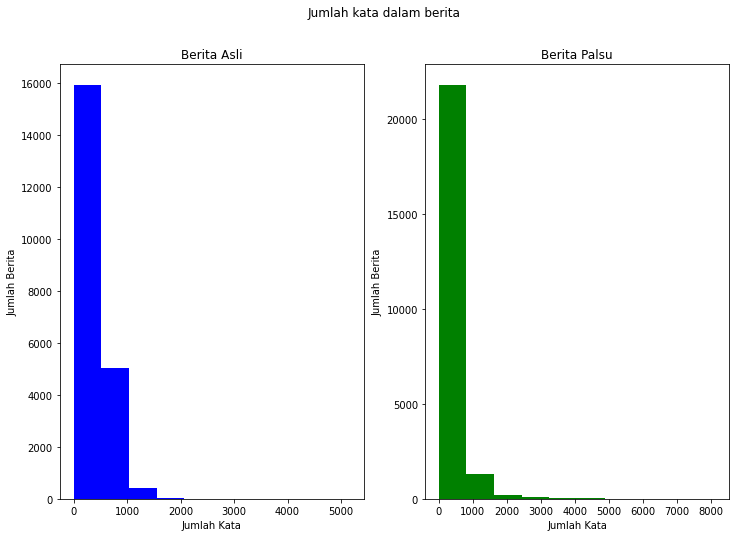

In [19]:
# Membuat plot untuk jumlah text pada berita palsu dan asli
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(12,8))
text_len=df[df['label']==1]['text'].str.split().map(lambda x: len(x))
ax1.hist(text_len,color='blue')
ax1.set_title('Berita Asli')
ax1.set_xlabel('Jumlah Kata')
ax1.set_ylabel('Jumlah Berita')

text_len=df[df['label']==0]['text'].str.split().map(lambda x: len(x))
ax2.hist(text_len,color='green')
ax2.set_title('Berita Palsu')
ax2.set_xlabel('Jumlah Kata')
ax2.set_ylabel('Jumlah Berita')
fig.suptitle('Jumlah kata dalam berita')
plt.show()

Ternyata jumlah kata yang terdapat pada berita lebih banyak di berita palsu, yang dimana kebanyakan data berita asli dibawah 500 dan berita palsu dibawah 800 kata. Selanjutnya akan dilihat distribusi rata-rata kata pada berita asli dan palsu.

/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/numpy/core/fromnumeric.py:3440: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.8/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/us

Text(0.5, 0.98, 'Rata-rata panjang kata pada berita')

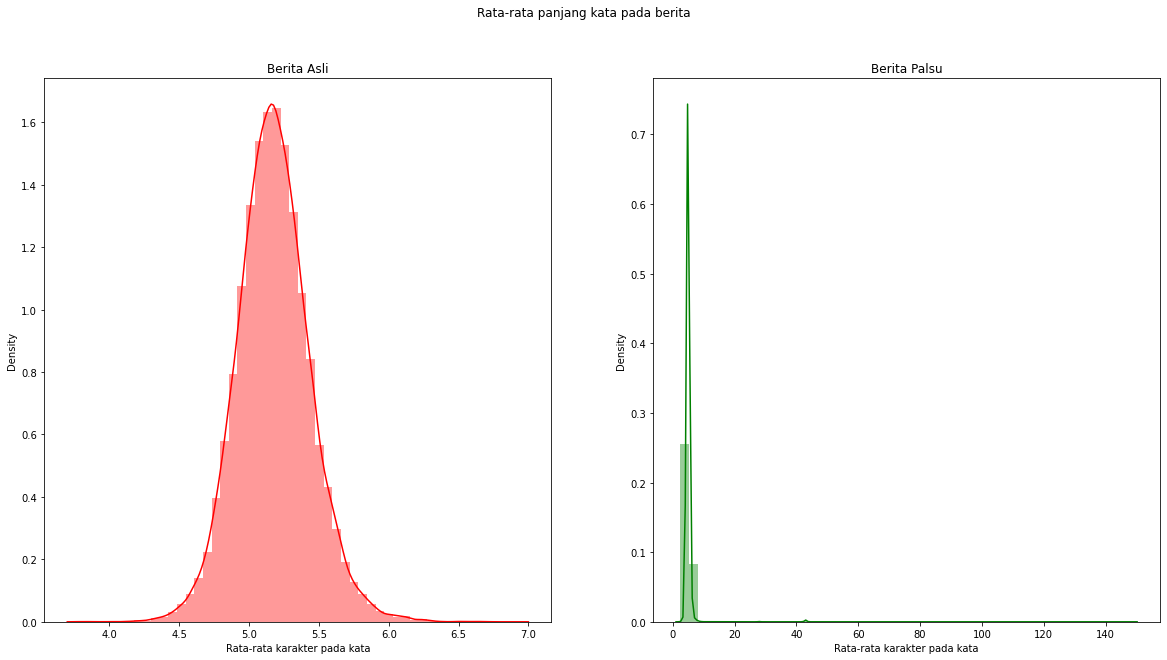

In [20]:
# Membuat plot untuk rata-rata panjang kata text pada berita palsu dan asli
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word_tr=df[df['label']==1]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word_tr.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Berita Asli')
ax1.set_xlabel('Rata-rata karakter pada kata')

word_fk=df[df['label']==0]['text'].str.split().apply(lambda x : [len(i) for i in x])
sns.distplot(word_fk.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Berita Palsu')
ax2.set_xlabel('Rata-rata karakter pada kata')
fig.suptitle('Rata-rata panjang kata pada berita')

Ternyata pada umumnya jumlah karakter pada kata di berita normal lebih sedikit daripada berita palsu, ini dimungkinkan karena penulisan artikelnya lebih non-formal dan kata baku di bahasa inggris pada umumnya tidak terdapat banyak karakter pada satu kata. Selanjutnya akan dilihat kata yang paling sering muncul menggunakan wordcloud.

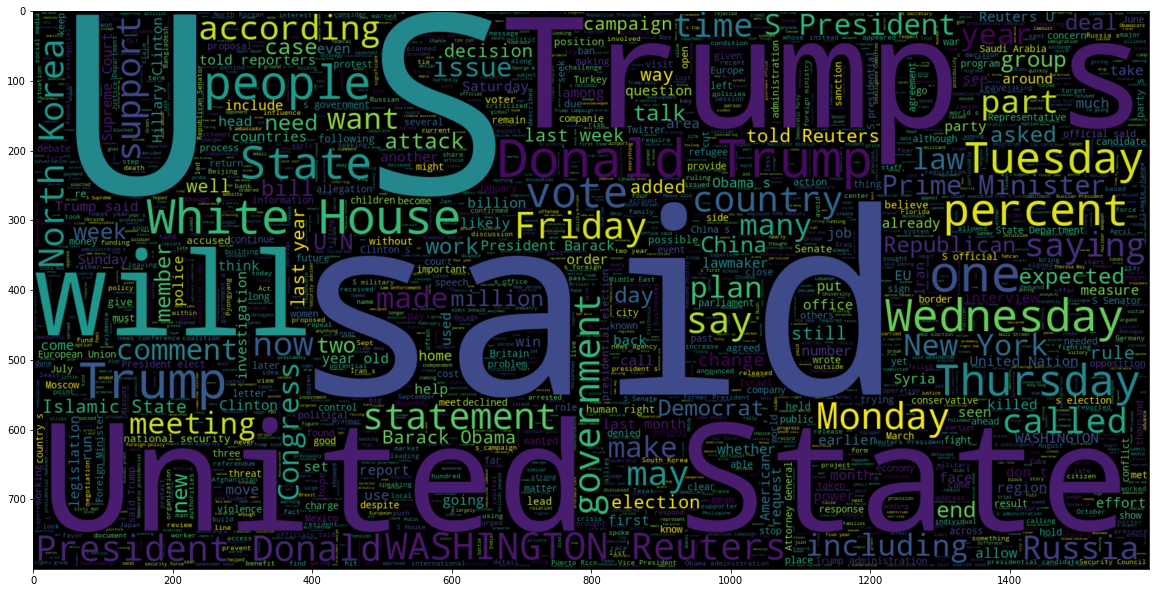

In [21]:
# Membuat wordcloud untuk melihat kata apa saja yang sering muncul di berita asli

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 1].text))
plt.imshow(wc , interpolation = 'bilinear')

Kata tertinggi adalah said, karena penulis belum membersihkan data dari stopwords dan lain-lain. Namun topik umumnya kebanyakan mengenai negara Amerika Serikat dan presiden donald trump. Selanjutnya akan dilakukan wordclod juga untuk data berita palsu.

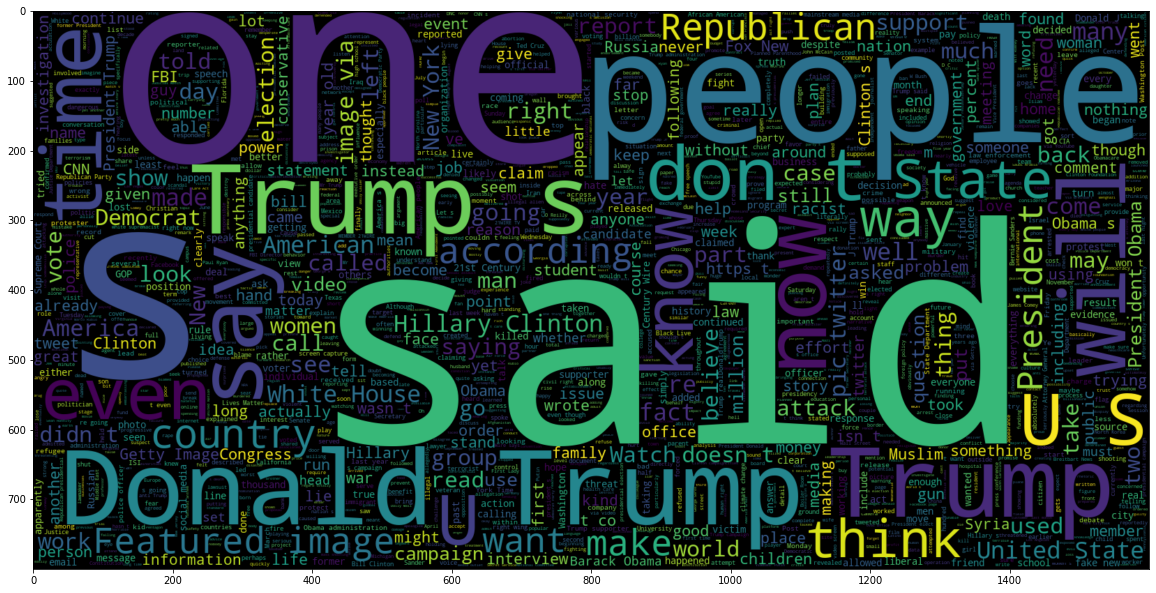

In [22]:
# Membuat wordcloud untuk melihat kata apa saja yang sering muncul di berita asli

plt.figure(figsize = (20,20)) 
wc = WordCloud(max_words = 2000 , width = 1600 , height = 800 , stopwords = STOPWORDS).generate(" ".join(df[df.label == 0].text))
plt.imshow(wc , interpolation = 'bilinear')

Dapat dilihat banyak sekali kata-kata informal dan topiknya pun tidak terlalu berbeda dari berita asli yaitu Amerika Serikat dan presidennya Donald Trump. Selanjutnya akan dilakukan proses preprocessing.

Dari EDA dapat disimpulkan bahwa : 

- Distribusi klasifikasi balanced perbedaan sekitar 2000 data.
- Subject berita asli dan palsu ada yang sama sehingga data akan teprediksi  oleh model dengan mudah bila dimasukan (seperti contekan).
- Umumnya berita palsu lebih banyak dalam jumlah kata dan karakter.
- Berita palsu memiliki banyak sumber berupa link dan akun twitter, sementara berita asli jarang ada.
- Topik berita rata-rata mengenai donald trump dan pemerintahan amerika serikat.
- Jumlah kata kebanyakan dibawah 500 kata di berita asli dan berita palsu dibawah 800 kata.

# 5. Data Preprocessing

Dari hasil EDA akan dilakukan dropping pada 2 kolom subject dan date karena tidak terlalu berkorelasi, bahkan subject 1:1 dengan label yang menjadikan model pasti akan akurat bila di feed subject tersebut karena subject di berita asli dan berita palsu tidak ada yang sama. Oleh karena itu dilakukan drop

In [23]:
# Menghapus 2 kolom subject dan date
df_t = df.drop(['subject','date'], axis = 1)
df_t

,title,text,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,1
...,...,...,...
44893,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,0
44894,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,0
44895,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,0
44896,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,0


Untuk mempermudah pembuatan model dan mengurangi parameter kolom title dan text akan penulis satukan.

In [24]:
# Menyatukan kolom title dan text
df['feature'] = df['title'] + ' ' + df['text']
df.drop('title', axis=1, inplace=True)
df.drop('text', axis=1, inplace=True)
df.drop('subject', axis=1, inplace=True)
df.drop('date', axis=1, inplace=True)
df

,label,feature
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,0,How to Blow $700 Million: Al Jazeera America F...


Dataset sudah dibersihkan selanjutnya akan dilakukan copy agar data awal tidak berubah apabila dibutuhkan perbandingan.

In [25]:
# Membuat copy dari dataframe
data = df.copy(deep=True)
data

,label,feature
0,1,"As U.S. budget fight looms, Republicans flip t..."
1,1,U.S. military to accept transgender recruits o...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...
3,1,FBI Russia probe helped by Australian diplomat...
4,1,Trump wants Postal Service to charge 'much mor...
...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
44896,0,How to Blow $700 Million: Al Jazeera America F...


Penulis melihat kalimat U.S. saat dilakukan word tokenize tidak akan bernilai oleh karena menghasilkan u dan s saja, oleh karena itu ditambahkan pada stopwords. Selanjutnya akan mendefinisikan stopwords yang akan digunakan.

In [26]:
# Mengambil library untuk stopwords

stopwd = list(set(stopwords.words('english')))
stopwd.append('u')
stopwd.append('s')
stopwd

['shouldn',
 'be',
 'a',
 "aren't",
 'ma',
 'down',
 'when',
 'our',
 'she',
 'theirs',
 'hadn',
 'wouldn',
 'should',
 "doesn't",
 'only',
 'was',
 'will',
 'or',
 'them',
 'nor',
 'than',
 'd',
 'isn',
 'it',
 'shan',
 'about',
 "wasn't",
 'its',
 'an',
 'o',
 'over',
 'haven',
 'themselves',
 'no',
 'and',
 'before',
 'they',
 'him',
 'me',
 'above',
 'were',
 'that',
 'because',
 "shouldn't",
 "you're",
 'does',
 'now',
 "don't",
 'are',
 'i',
 'why',
 "hasn't",
 'had',
 'both',
 'more',
 'didn',
 't',
 'up',
 'after',
 'then',
 'under',
 'to',
 'not',
 'did',
 'ours',
 'those',
 'can',
 'what',
 'out',
 'some',
 'against',
 'the',
 'if',
 'once',
 'been',
 'any',
 "that'll",
 'below',
 'most',
 'own',
 "wouldn't",
 "you'll",
 'for',
 'so',
 'by',
 'there',
 'doesn',
 "didn't",
 'too',
 'myself',
 'where',
 'other',
 'he',
 've',
 'm',
 'won',
 "isn't",
 'doing',
 'few',
 'just',
 'of',
 'again',
 'her',
 'couldn',
 'which',
 "should've",
 'ain',
 'off',
 'weren',
 'as',
 "needn't"

Dataset sudah dicopy selanjutnya akan dilakukan text preprocessing untuk memperkecil parameter yang harus dipelajari oleh model.

In [27]:
# Membuat fungsi preprocessing text

def text_proses(text):
  # Mengubah text ke Lowercase agar semua data seragam
  text = text.lower()
  
  # Menghilangkan @/Mention karena pada berita palsu ada mention akun twitter
  text = re.sub("@[A-Za-z0-9_]+", " ", text)
  
  # Menghilangkan #/Hashtag untuk mengantisipasi karena berita palsu mengambil dari twitter
  text = re.sub("#[A-Za-z0-9_]+", " ", text)
  
  # Menghilangkan \n untuk antisipasi
  text = re.sub(r"\\n", " ",text)
  
  # Menghilangkan Whitespace untuk antisipasi
  text = text.strip()

  # Menghilangkan Link dikarenakan berita palsu terdapat link ke artikel lain
  text = re.sub(r"http\S+", " ", text)
  text = re.sub(r"www.\S+", " ", text)

  # Menghilangkan yang Bukan Huruf seperti Emoji, Simbol Matematika (seperti μ), dst untuk antisipasi
  text = re.sub("[^A-Za-z\s']", " ", text)

  # Melakukan Tokenisasi
  tokens = word_tokenize(text)

  # Menghilangkan Stopwords
  text = ' '.join([word for word in tokens if word not in stopwd])
  
  return text

In [28]:
# Melakukan preprocessing pada data

data['text_processed'] = data['feature'].apply(lambda x: text_proses(x))
data

,label,feature,text_processed
0,1,"As U.S. budget fight looms, Republicans flip t...",budget fight looms republicans flip fiscal scr...
1,1,U.S. military to accept transgender recruits o...,military accept transgender recruits monday pe...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator 'let mr mueller job ...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge 'much ' amaz...
...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain john mccain furious iran treated us sai...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice yahoo settles e mail privacy class act...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan us allied safe zone plan take territ...
44896,0,How to Blow $700 Million: Al Jazeera America F...,blow million al jazeera america finally calls ...


Data sudah dipreprocessing sekarang penulias akan melihat sebelum dan sesudahnya apakah ada yang harus ditambahkan di stopwords.

In [29]:
# Melihat hasil dari preprocessing
data.feature[2]

"Senior U.S. Republican senator: 'Let Mr. Mueller do his job' WASHINGTON (Reuters) - The special counsel investigation of links between Russia and President Trump’s 2016 election campaign should continue without interference in 2018, despite calls from some Trump administration allies and Republican lawmakers to shut it down, a prominent Republican senator said on Sunday. Lindsey Graham, who serves on the Senate armed forces and judiciary committees, said Department of Justice Special Counsel Robert Mueller needs to carry on with his Russia investigation without political interference. “This investigation will go forward. It will be an investigation conducted without political influence,” Graham said on CBS’s Face the Nation news program. “And we all need to let Mr. Mueller do his job. I think he’s the right guy at the right time.”  The question of how Russia may have interfered in the election, and how Trump’s campaign may have had links with or co-ordinated any such effort, has loome

In [30]:
# Melihat hasil dari preprocessing
data.text_processed[2]

"senior republican senator 'let mr mueller job ' washington reuters special counsel investigation links russia president trump election campaign continue without interference despite calls trump administration allies republican lawmakers shut prominent republican senator said sunday lindsey graham serves senate armed forces judiciary committees said department justice special counsel robert mueller needs carry russia investigation without political interference investigation go forward investigation conducted without political influence graham said cbs face nation news program need let mr mueller job think right guy right time question russia may interfered election trump campaign may links co ordinated effort loomed white house since trump took office january shows sign receding trump prepares second year power despite intensified rhetoric trump allies recent weeks accusing mueller team bias republican president trump seemed undercut supporters interview last week new york times said 

Untuk 3 data awal tidak terlalu terlihat, selanjutnya penulis akan melakukan membuat data stemming dan lemmatizer.

In [31]:
# Mendefinisikan model stemming dan melakukan stemming

porter = PorterStemmer()
data['stemming'] = data['text_processed'].apply(lambda x: porter.stem(x))
data

,label,feature,text_processed,stemming
0,1,"As U.S. budget fight looms, Republicans flip t...",budget fight looms republicans flip fiscal scr...,budget fight looms republicans flip fiscal scr...
1,1,U.S. military to accept transgender recruits o...,military accept transgender recruits monday pe...,military accept transgender recruits monday pe...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator 'let mr mueller job ...,senior republican senator 'let mr mueller job ...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge 'much ' amaz...,trump wants postal service charge 'much ' amaz...
...,...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain john mccain furious iran treated us sai...,mcpain john mccain furious iran treated us sai...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice yahoo settles e mail privacy class act...,justice yahoo settles e mail privacy class act...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan us allied safe zone plan take territ...,sunnistan us allied safe zone plan take territ...
44896,0,How to Blow $700 Million: Al Jazeera America F...,blow million al jazeera america finally calls ...,blow million al jazeera america finally calls ...


Stemming sudah dilakukan dan ternyaga secara kasar tidak terlalu kelihatan perbedaannya. Selanjutnya akan dilakukan model lemmatizer.

In [32]:
# Mendefinisikan model lemmatizer dan melakukan lemmatizer

wordnet = WordNetLemmatizer()
data['lemmatizer'] = data['text_processed'].apply(lambda x: wordnet.lemmatize(x))
data

,label,feature,text_processed,stemming,lemmatizer
0,1,"As U.S. budget fight looms, Republicans flip t...",budget fight looms republicans flip fiscal scr...,budget fight looms republicans flip fiscal scr...,budget fight looms republicans flip fiscal scr...
1,1,U.S. military to accept transgender recruits o...,military accept transgender recruits monday pe...,military accept transgender recruits monday pe...,military accept transgender recruits monday pe...
2,1,Senior U.S. Republican senator: 'Let Mr. Muell...,senior republican senator 'let mr mueller job ...,senior republican senator 'let mr mueller job ...,senior republican senator 'let mr mueller job ...
3,1,FBI Russia probe helped by Australian diplomat...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...,fbi russia probe helped australian diplomat ti...
4,1,Trump wants Postal Service to charge 'much mor...,trump wants postal service charge 'much ' amaz...,trump wants postal service charge 'much ' amaz...,trump wants postal service charge 'much ' amaz...
...,...,...,...,...,...
44893,0,McPain: John McCain Furious That Iran Treated ...,mcpain john mccain furious iran treated us sai...,mcpain john mccain furious iran treated us sai...,mcpain john mccain furious iran treated us sai...
44894,0,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,justice yahoo settles e mail privacy class act...,justice yahoo settles e mail privacy class act...,justice yahoo settles e mail privacy class act...
44895,0,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,sunnistan us allied safe zone plan take territ...,sunnistan us allied safe zone plan take territ...,sunnistan us allied safe zone plan take territ...
44896,0,How to Blow $700 Million: Al Jazeera America F...,blow million al jazeera america finally calls ...,blow million al jazeera america finally calls ...,blow million al jazeera america finally calls ...


Sudah dilakukan lemmatizer dan tidak kelihatan dari preview tabel diatas. Secara detail penulis ingin mengetahui apakah ada yang berbeda dari hasil stemming dan lemmatizer. Akan dilihat setelah dilakukan countvectorizer. Selanjutnya data dipisahkan dari inference terlebih dahulu.

In [33]:
# Mengambil data inference
inf = data.sample(10, random_state=10)
data_t = data.drop(inf.index)

print('Shape data sebelum didrop : ', data.shape)
print('Shape data setelah didrop : ', data_t.shape)

Shape data sebelum didrop :  (44898, 5)
Shape data setelah didrop :  (44888, 5)


Data inference telah diambil sekarang dilakukan pemisahan fitur dan target.

In [34]:
# Memisahkan feature dan target
X_lem = data_t['lemmatizer']
X_stem = data_t['stemming']

X_inf_lem = inf['lemmatizer']
X_inf_stem = inf['stemming']

y = data_t['label']

y_inf = inf['label']

# Melihat data feature
X_lem

0        budget fight looms republicans flip fiscal scr...
1        military accept transgender recruits monday pe...
2        senior republican senator 'let mr mueller job ...
3        fbi russia probe helped australian diplomat ti...
4        trump wants postal service charge 'much ' amaz...
                               ...                        
44893    mcpain john mccain furious iran treated us sai...
44894    justice yahoo settles e mail privacy class act...
44895    sunnistan us allied safe zone plan take territ...
44896    blow million al jazeera america finally calls ...
44897    navy sailors held iranian military signs neoco...
Name: lemmatizer, Length: 44888, dtype: object

In [35]:
# Melihat data target
y

0        1
1        1
2        1
3        1
4        1
        ..
44893    0
44894    0
44895    0
44896    0
44897    0
Name: label, Length: 44888, dtype: int64

Feature dan target sudah terpisah selanjutnya akan dilakukan proses splitting untuk data inference.

In [36]:
# Memisahkan data train, val dan test untuk data stemming

X_trainval_s, X_test_s, y_trainval_s, y_test_s = train_test_split(X_stem, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10, 
                                                    stratify=y)

# Memisahkan data train dan val
X_train_s, X_val_s, y_train_s, y_val_s = train_test_split(X_trainval_s, 
                                                    y_trainval_s, 
                                                    test_size=0.2, 
                                                    random_state=10, 
                                                    stratify=y_trainval_s)

print('Train Size : ', X_train_s.shape)
print('Val Size : ', X_val_s.shape)
print('Test Size  : ', X_test_s.shape)
  

Train Size :  (28728,)
Val Size :  (7182,)
Test Size  :  (8978,)


Data train val dan test sudah terpisah dan melihat distribusi datanya penulis rasa ini balanced. selanjutnya akan dilakukan pemisahan data untuk model lemmatizer.

In [37]:
# Memisahkan data train, val dan test untuk data lemmatizer

X_trainval_l, X_test_l, y_trainval_l, y_test_l = train_test_split(X_lem, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=10, 
                                                    stratify=y)

# Memisahkan data train dan val
X_train_l, X_val_l, y_train_l, y_val_l = train_test_split(X_trainval_l, 
                                                    y_trainval_l, 
                                                    test_size=0.2, 
                                                    random_state=10, 
                                                    stratify=y_trainval_l)

print('Train Size : ', X_train_l.shape)
print('Val Size : ', X_val_l.shape)
print('Test Size  : ', X_test_l.shape)
  

Train Size :  (28728,)
Val Size :  (7182,)
Test Size  :  (8978,)


Data sudah terpisah selanjutnya akan dilakukan countvectorizer untuk mengubah data text menjadi matrix dan mengetahui jumlah vocab dan nilai maximum dari text. 

In [38]:
# Melakukan CountVectorizer

# Data stem
Vectorize_s = CountVectorizer()
X_train_vec_s = Vectorize_s.fit_transform(X_train_s)
X_val_vec_s = Vectorize_s.transform(X_val_s)
X_test_vec_s = Vectorize_s.transform(X_test_s)

# Date lemmatizer
Vectorize_l = CountVectorizer()
X_train_vec_l = Vectorize_l.fit_transform(X_train_l)
X_val_vec_l = Vectorize_l.transform(X_val_l)
X_test_vec_l = Vectorize_l.transform(X_test_l)


X_train_vec_s, X_train_vec_l

(<28728x88878 sparse matrix of type '<class 'numpy.int64'>'
 	with 4688862 stored elements in Compressed Sparse Row format>,
 <28728x87705 sparse matrix of type '<class 'numpy.int64'>'
 	with 4685707 stored elements in Compressed Sparse Row format>)

Ternyata terdapat 4688862 vector yang tersimpan di data train stemming dan 4685707 vector di data lemmatizer. Selanjutnya akan melihat berapa jumlah vocab dan kata dalam satu text.

In [39]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document data lemmatizer

jumlah_voc_l = len(Vectorize_l.vocabulary_.keys())
jumlah_kata = max([len(i.split(" ")) for i in X_train_l])

# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document data stemming

jumlah_voc_s = len(Vectorize_s.vocabulary_.keys())

print("Jumlah vocab Stemming : ", jumlah_voc_s)
print("Jumlah vocab Lemmatizer : ", jumlah_voc_l)
print("Panjang kalimat maksimum : ", jumlah_kata, "kata")

Jumlah vocab Stemming :  88878
Jumlah vocab Lemmatizer :  87705
Panjang kalimat maksimum :  4980 kata


Vocabulary yang dihasilkan lemmatizer lebih rendah kurang lebih 1000 kata, namun karena jumlah maksimum kata dalam kalimat terlalu besar penulis akan mencoba melihat nilai rata-rata dan quartil 75% nya.

In [40]:
# Mencari Jumlah Vocab dan Panjang Token dalam Satu Document

Jumlah_artikel = len(X_train_l)
Tot_jumlah_kata = 0

for line in X_train_l:
    jumlah_kata = len(line.split())
    Tot_jumlah_kata += jumlah_kata

rata_rata_kata = int(round((Tot_jumlah_kata/Jumlah_artikel)))

quantile_kata = int(np.quantile([len(i.split(" ")) for i in X_train_l],0.75))

print("Panjang kalimat rata-rata : ", rata_rata_kata, "kata")
print("Panjang kalimat 75% quantile : ", quantile_kata, "kata")

Panjang kalimat rata-rata :  240 kata
Panjang kalimat 75% quantile :  297 kata


Dipilih untuk embedding dan tokenization digunakan 297 kata agar model optimal. Selanjutnya akan dilakukan text vectorization.

In [41]:
# Text Vectorization untuk data stemming dan lemmatizer

text_vectorization_s = TextVectorization(max_tokens=jumlah_voc_s,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=quantile_kata,
                                       input_shape=(1,) # Jika ingin menggunakan Sequential API
                                       )

text_vectorization_l = TextVectorization(max_tokens=jumlah_voc_l,
                                       standardize="lower_and_strip_punctuation",
                                       split="whitespace",
                                       ngrams=None,
                                       output_mode="int",
                                       output_sequence_length=quantile_kata,
                                       input_shape=(1,) # Jika ingin menggunakan Sequential API
                                       )

text_vectorization_l.adapt(X_train_s)
text_vectorization_s.adapt(X_train_s)

In [42]:
# Melihat hasil text vectorization dibandingkan dengan data sebelumnya

print('Contoh data sebelum vectorization')
print(data.stemming[2])
print('Jumlah kata :', len(data.stemming[2].split()))
print('')

print('Hasil Text Vectorization')
print(text_vectorization_s([data.stemming[2]]))
print('Ukuran vector : ', text_vectorization_l([data.stemming[2]]).shape)

Contoh data sebelum vectorization
senior republican senator 'let mr mueller job ' washington reuters special counsel investigation links russia president trump election campaign continue without interference despite calls trump administration allies republican lawmakers shut prominent republican senator said sunday lindsey graham serves senate armed forces judiciary committees said department justice special counsel robert mueller needs carry russia investigation without political interference investigation go forward investigation conducted without political influence graham said cbs face nation news program need let mr mueller job think right guy right time question russia may interfered election trump campaign may links co ordinated effort loomed white house since trump took office january shows sign receding trump prepares second year power despite intensified rhetoric trump allies recent weeks accusing mueller team bias republican president trump seemed undercut supporters intervi

Data stemming dan lemmatizer sudah di vectorize, selanjutnya melihat 50 kata tertinggi pada setiap data.

In [43]:
# Melihat Top 50 Token paling banyak muncul

top50 = pd.DataFrame()
top50['stemming'] = text_vectorization_s.get_vocabulary()[:50]
top50['lemmatizer'] = text_vectorization_l.get_vocabulary()[:50]
top50

,stemming,lemmatizer
0,,
1,[UNK],[UNK]
2,trump,trump
3,said,said
4,president,president
5,would,would
6,people,people
7,one,one
8,state,state
9,new,new


Dilihat dari data diatas 50 kata tidak terlihat hal hal yang jangkal. Oleh karena itu menurut personal judgement penulis data sudah bisa digunakan untuk model. Selanjutnya akan dilakukan pendefinisian model.

# 6. Model Definition

Akan dibuat 2 model yaitu model menggunakan dataset lemmatizer dan stemming, dan digunakan model LSTM dikarenakan dataset lumayan besar. Embedding dimensinya 128, menggunakan activation sigmoid karena data yang dicari dengan jenis binary.

In [44]:
# Definisi model LSTM dengan data stemming

model_s = Sequential()
model_s.add(text_vectorization_s)
model_s.add(Embedding(input_dim=jumlah_voc_s,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jumlah_kata
                      ))
model_s.add(LSTM(32))
model_s.add(Dropout(0.2))
model_s.add(Dense(1,activation='sigmoid'))

model_s.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_s.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization (TextVec  (None, 297)              0         
 torization)                                                     
                                                                 
 embedding (Embedding)       (None, 297, 128)          11376384  
                                                                 
 lstm (LSTM)                 (None, 32)                20608     
                                                                 
 dropout (Dropout)           (None, 32)                0         
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 11,397,025
Trainable params: 11,397,025
Non-trainable params: 0
____________________________________________

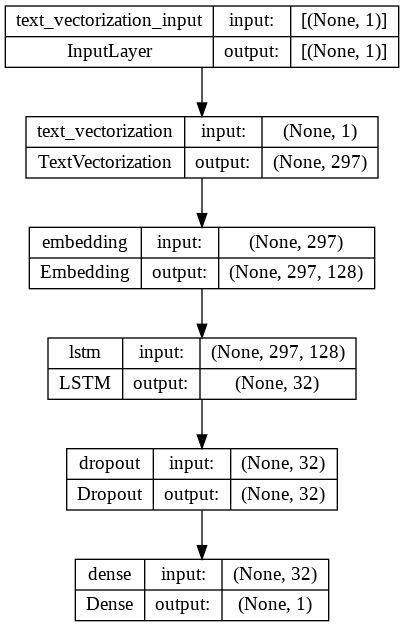

In [45]:
# Plot dari model

tf.keras.utils.plot_model(model_s, show_shapes=True)

In [46]:
# Definisi model LSTM untuk data lemmatizer

model_l = Sequential()
model_l.add(text_vectorization_l)
model_l.add(Embedding(input_dim=jumlah_voc_l,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jumlah_kata
                      ))
model_l.add(LSTM(32))
model_l.add(Dropout(0.2))
model_l.add(Dense(1,activation='sigmoid'))

model_l.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

model_l.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 297)              0         
 ectorization)                                                   
                                                                 
 embedding_1 (Embedding)     (None, 297, 128)          11226240  
                                                                 
 lstm_1 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,246,881
Trainable params: 11,246,881
Non-trainable params: 0
__________________________________________

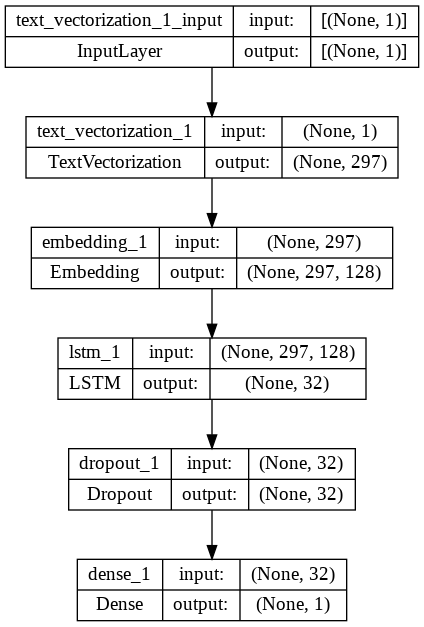

In [47]:
# Plot dari model

tf.keras.utils.plot_model(model_l, show_shapes=True)

# 7. Model Training

In [48]:
# Melatih model LSTM data stemming
model_lstm_stem = model_s.fit(X_train_s,
                         y_train_s,
                         epochs=10,
                         validation_data=(X_val_s, y_val_s))

Epoch 1/10
898/898 [==============================] - 26s 22ms/step - loss: 0.3542 - accuracy: 0.8623 - val_loss: 0.2458 - val_accuracy: 0.9297
Epoch 2/10
898/898 [==============================] - 19s 21ms/step - loss: 0.4425 - accuracy: 0.7902 - val_loss: 0.2073 - val_accuracy: 0.9417
Epoch 3/10
898/898 [==============================] - 19s 21ms/step - loss: 0.2173 - accuracy: 0.9412 - val_loss: 0.1875 - val_accuracy: 0.9525
Epoch 4/10
898/898 [==============================] - 19s 21ms/step - loss: 0.1830 - accuracy: 0.9549 - val_loss: 0.2319 - val_accuracy: 0.9350
Epoch 5/10
898/898 [==============================] - 19s 21ms/step - loss: 0.1683 - accuracy: 0.9577 - val_loss: 0.2106 - val_accuracy: 0.9432
Epoch 6/10
898/898 [==============================] - 19s 21ms/step - loss: 0.1664 - accuracy: 0.9574 - val_loss: 0.2223 - val_accuracy: 0.9396
Epoch 7/10
898/898 [==============================] - 20s 22ms/step - loss: 0.2679 - accuracy: 0.8997 - val_loss: 0.2584 - val_accuracy:

In [49]:
# Melatih model LSTM data lemmatizer
model_lstm_lemmatizer = model_l.fit(X_train_l,
                         y_train_l,
                         epochs=10,
                         validation_data=(X_val_l, y_val_l))

Epoch 1/10
898/898 [==============================] - 22s 22ms/step - loss: 0.4488 - accuracy: 0.8052 - val_loss: 0.5408 - val_accuracy: 0.7147
Epoch 2/10
898/898 [==============================] - 19s 21ms/step - loss: 0.2968 - accuracy: 0.8954 - val_loss: 0.2105 - val_accuracy: 0.9419
Epoch 3/10
898/898 [==============================] - 19s 21ms/step - loss: 0.2163 - accuracy: 0.9410 - val_loss: 0.2102 - val_accuracy: 0.9440
Epoch 4/10
898/898 [==============================] - 19s 21ms/step - loss: 0.4545 - accuracy: 0.7784 - val_loss: 0.2761 - val_accuracy: 0.9314
Epoch 5/10
898/898 [==============================] - 19s 21ms/step - loss: 0.4676 - accuracy: 0.7656 - val_loss: 0.5391 - val_accuracy: 0.7059
Epoch 6/10
898/898 [==============================] - 19s 21ms/step - loss: 0.2441 - accuracy: 0.9185 - val_loss: 0.1837 - val_accuracy: 0.9468
Epoch 7/10
898/898 [==============================] - 20s 22ms/step - loss: 0.2545 - accuracy: 0.9176 - val_loss: 0.4119 - val_accuracy:

# 8. Model Evaluation

## Model Stemming

Text(0.5, 0.98, 'Stem Model Performance')

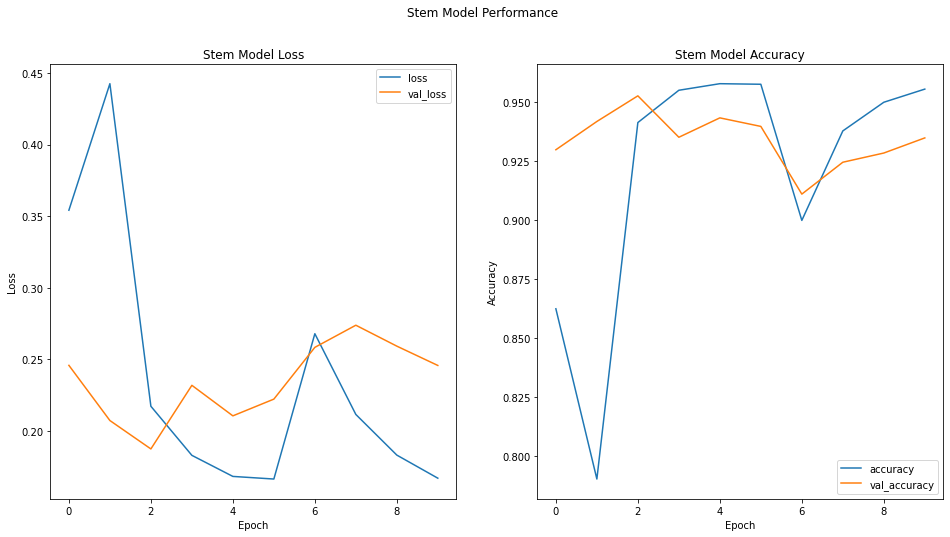

In [50]:
# Melihat performa model stemming

metrics_s = pd.DataFrame(model_lstm_stem.history)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

metrics_s[['loss', 'val_loss']].plot(ylabel = 'Loss', xlabel = 'Epoch', title = 'Stem Model Loss', ax=axes[0])
metrics_s[['accuracy', 'val_accuracy']].plot(ylabel = 'Accuracy', xlabel = 'Epoch', title = 'Stem Model Accuracy', ax=axes[1])
fig.suptitle('Stem Model Performance')

Dari plot diatas dapat disimpulkan bahwa terjadi gradient exploding. Penulis akan mencoba menambahkan kernel regularizer untuk mengurangin exploding, mengganti optimizer ke AdaMax dan menambahkan epoch nya.

In [51]:
# Definisi model LSTM dengan data STEM

model_s_imp = Sequential()
model_s_imp.add(text_vectorization_s)
model_s_imp.add(Embedding(input_dim=jumlah_voc_s,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jumlah_kata
                      ))
model_s_imp.add(LSTM(32, kernel_regularizer='l2'))
model_s_imp.add(Dropout(0.2))
model_s_imp.add(Dense(1,activation='sigmoid'))

model_s_imp.compile(loss='binary_crossentropy',optimizer='AdaMax',metrics='accuracy')

# Melatih model LSTM data stemming
model_lstm_stem_imp = model_s_imp.fit(X_train_s,
                         y_train_s,
                         epochs=12,
                         validation_data=(X_val_s, y_val_s))

Epoch 1/12
898/898 [==============================] - 17s 17ms/step - loss: 0.7706 - accuracy: 0.5430 - val_loss: 0.6891 - val_accuracy: 0.5395
Epoch 2/12
898/898 [==============================] - 15s 17ms/step - loss: 0.3857 - accuracy: 0.8635 - val_loss: 0.2384 - val_accuracy: 0.9414
Epoch 3/12
898/898 [==============================] - 15s 17ms/step - loss: 0.2248 - accuracy: 0.9396 - val_loss: 0.1958 - val_accuracy: 0.9507
Epoch 4/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1617 - accuracy: 0.9658 - val_loss: 0.1762 - val_accuracy: 0.9605
Epoch 5/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1623 - accuracy: 0.9638 - val_loss: 0.1567 - val_accuracy: 0.9660
Epoch 6/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1493 - accuracy: 0.9680 - val_loss: 0.1540 - val_accuracy: 0.9653
Epoch 7/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1383 - accuracy: 0.9699 - val_loss: 0.1514 - val_accuracy:

Text(0.5, 0.98, 'Stem Model Performance')

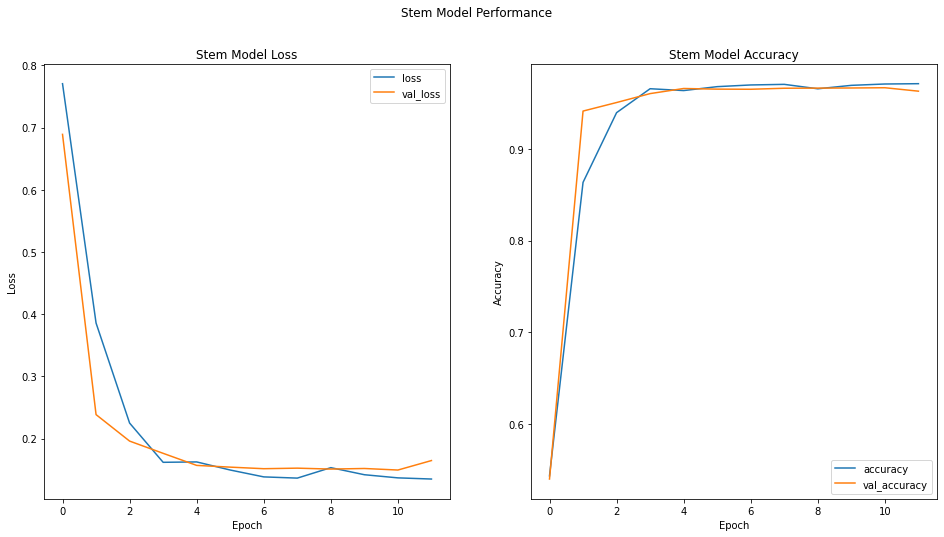

In [52]:
# Melihat performa model stemming

metrics_s_imp = pd.DataFrame(model_lstm_stem_imp.history)

fig_s, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

metrics_s_imp[['loss', 'val_loss']].plot(ylabel = 'Loss', xlabel = 'Epoch', title = 'Stem Model Loss', ax=axes[0])
metrics_s_imp[['accuracy', 'val_accuracy']].plot(ylabel = 'Accuracy', xlabel = 'Epoch', title = 'Stem Model Accuracy', ax=axes[1])
fig_s.suptitle('Stem Model Performance')

Model sudah tidak terjadi gradient Exploding, hanya epoch awalnya saja agak tidak stabil namun diatas epoch 4 sudah mulai good fit. Selanjutnya akan dilakukan evaluasi pada model Lemmatizer.

----------

## Model Lemmatizer

Text(0.5, 0.98, 'Lemmatizer Model Performance')

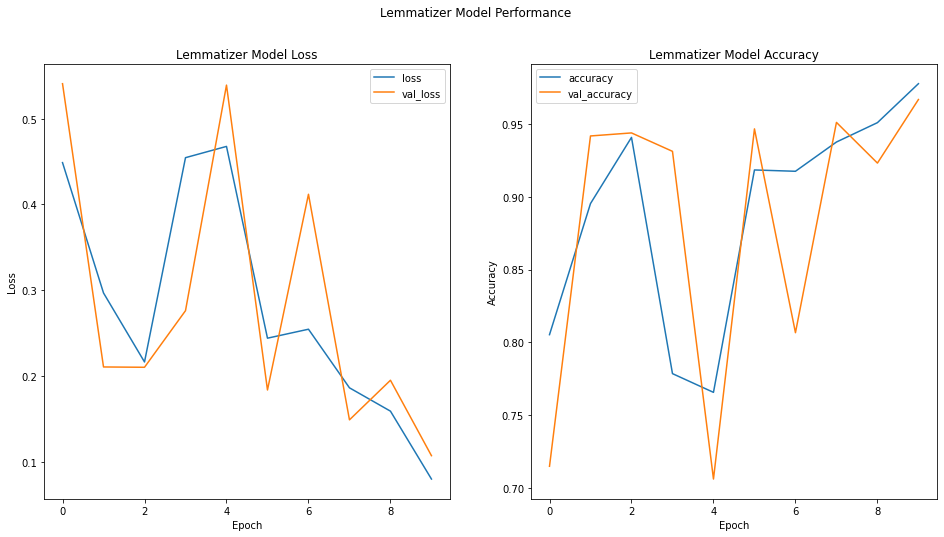

In [53]:
# Melihat performa model Lemmatizer

metrics_l = pd.DataFrame(model_lstm_lemmatizer.history)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

metrics_l[['loss', 'val_loss']].plot(ylabel = 'Loss', xlabel = 'Epoch', title = 'Lemmatizer Model Loss', ax=axes[0])
metrics_l[['accuracy', 'val_accuracy']].plot(ylabel = 'Accuracy', xlabel = 'Epoch', title = 'Lemmatizer Model Accuracy', ax=axes[1])
fig.suptitle('Lemmatizer Model Performance')

Model lemmatizer juga ternyata terjadi gradient exploding. Penulis akan mencoba menambahkan parameter yang sama pada improvement model stemming pada model ini.

In [54]:
# Definisi model LSTM dengan data Lemmatizer

model_l_imp = Sequential()
model_l_imp.add(text_vectorization_l)
model_l_imp.add(Embedding(input_dim=jumlah_voc_l,
                      output_dim=128,
                      embeddings_initializer="uniform",
                      input_length=jumlah_kata
                      ))
model_l_imp.add(LSTM(32, kernel_regularizer='l2'))
model_l_imp.add(Dropout(0.2))
model_l_imp.add(Dense(1,activation='sigmoid'))

model_l_imp.compile(loss='binary_crossentropy',optimizer='AdaMax',metrics='accuracy')

# Melatih model LSTM data lemmatizer
model_lstm_lem_imp = model_l_imp.fit(X_train_l,
                         y_train_l,
                         epochs=12,
                         validation_data=(X_val_l, y_val_l))

Epoch 1/12
898/898 [==============================] - 17s 17ms/step - loss: 0.7368 - accuracy: 0.5985 - val_loss: 0.3852 - val_accuracy: 0.8946
Epoch 2/12
898/898 [==============================] - 15s 17ms/step - loss: 0.2565 - accuracy: 0.9334 - val_loss: 0.2142 - val_accuracy: 0.9464
Epoch 3/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1901 - accuracy: 0.9543 - val_loss: 0.2315 - val_accuracy: 0.9379
Epoch 4/12
898/898 [==============================] - 15s 17ms/step - loss: 0.2164 - accuracy: 0.9441 - val_loss: 0.2013 - val_accuracy: 0.9486
Epoch 5/12
898/898 [==============================] - 15s 16ms/step - loss: 0.1573 - accuracy: 0.9657 - val_loss: 0.1425 - val_accuracy: 0.9694
Epoch 6/12
898/898 [==============================] - 15s 17ms/step - loss: 0.1312 - accuracy: 0.9729 - val_loss: 0.1446 - val_accuracy: 0.9684
Epoch 7/12
898/898 [==============================] - 15s 16ms/step - loss: 0.1259 - accuracy: 0.9739 - val_loss: 0.1612 - val_accuracy:

Text(0.5, 0.98, 'Lemmatizer Model Performance')

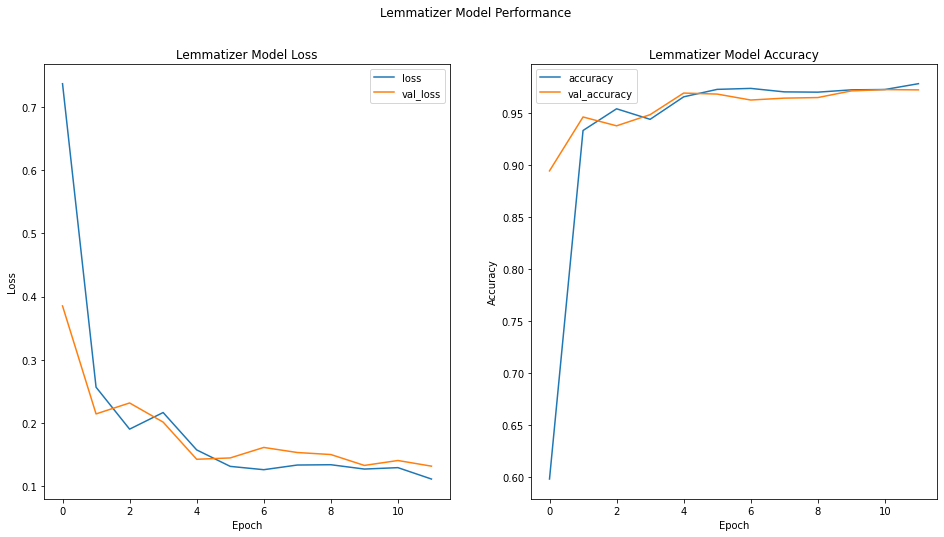

In [55]:
# Melihat performa model Lemmatizer

metrics_l_imp = pd.DataFrame(model_lstm_lem_imp.history)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

metrics_l_imp[['loss', 'val_loss']].plot(ylabel = 'Loss', xlabel = 'Epoch', title = 'Lemmatizer Model Loss', ax=axes[0])
metrics_l_imp[['accuracy', 'val_accuracy']].plot(ylabel = 'Accuracy', xlabel = 'Epoch', title = 'Lemmatizer Model Accuracy', ax=axes[1])
fig.suptitle('Lemmatizer Model Performance')

Dari plot diatas model lemmatizer exploding gradient sudah berkurang, namun model overfitting setelah epoch 5 keatas, dan bila dilihat waktunya pula masih kalah dengan model stemming, padahal dimensi inputnya lebih sedikit lemmatizer. Selanjutnya akan dilakukan evaluasi menggunakan data test pada kedua model dengan bantuan classification report dan confusion matrix.

281/281 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4695
           1       0.97      0.96      0.96      4283

    accuracy                           0.97      8978
   macro avg       0.97      0.97      0.97      8978
weighted avg       0.97      0.97      0.97      8978



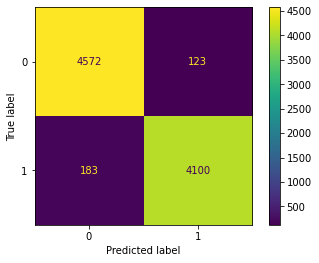

In [56]:
# Evaluasi model stemming pada data test

y_pred_stem = model_s_imp.predict(X_test_s)
y_pred_stem = np.where(y_pred_stem >=0.5, 1, 0)

cm_stem = confusion_matrix(y_test_s, y_pred_stem)

print(classification_report(y_test_s, y_pred_stem))
ConfusionMatrixDisplay(cm_stem).plot()

281/281 [==============================] - 3s 8ms/step
              precision    recall  f1-score   support

           0       0.99      0.96      0.98      4695
           1       0.96      0.99      0.98      4283

    accuracy                           0.98      8978
   macro avg       0.98      0.98      0.98      8978
weighted avg       0.98      0.98      0.98      8978



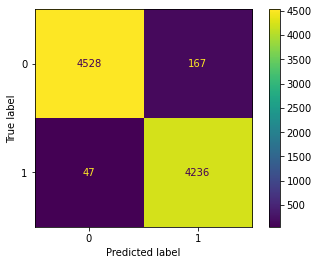

In [57]:
# Evaluasi model lemmatizer pada data test

y_pred_lemm = model_l_imp.predict(X_test_l)
y_pred_lemm = np.where(y_pred_lemm >=0.5, 1, 0)

cm_lemm = confusion_matrix(y_test_l,y_pred_lemm)

print(classification_report(y_test_l, y_pred_lemm))
ConfusionMatrixDisplay(cm_lemm).plot()

Dari hasil diatas, model lemmatizer ternyata lebih unggul dalam waktu prediksi, akurasi dan sensitifitas. Berarti model ini mampu mengenali data dengan baik dan melakukan prediksi dengan kepresisian yang tinggi, sehingga nilai harmonik nya pun 98% di kedua class atau mampu mengenali dan memprediksi bahwa berita itu antara palsu dan asli dengan baik. Oleh karena itu dipilih model `Lemmatizer`. Selanjutnya model akan disimpan untuk deployment.

# 9. Model Saving

In [58]:
# Melihat summary dari model terpilih
model_l_imp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 297)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 297, 128)          11226240  
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,246,881
Trainable params: 11,246,881
Non-trainable params: 0
__________________________________________

In [59]:
# Melakukan freezing trainable parameter agar model tidak akan melakukan training untuk deployment
model_l_imp.trainable = False
model_l_imp.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 297)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 297, 128)          11226240  
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,246,881
Trainable params: 0
Non-trainable params: 11,246,881
__________________________________________

In [60]:
# Melakukan penyimpanan model

model_l_imp.save('fake_news_model')

# 10. Model Inference

In [61]:
# Memuat model yang telah disimpan
model_predict = load_model('fake_news_model')
model_predict.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_1 (TextV  (None, 297)              0         
 ectorization)                                                   
                                                                 
 embedding_3 (Embedding)     (None, 297, 128)          11226240  
                                                                 
 lstm_3 (LSTM)               (None, 32)                20608     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 11,246,881
Trainable params: 0
Non-trainable params: 11,246,881
__________________________________________

1/1 [==============================] - 0s 411ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         5

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



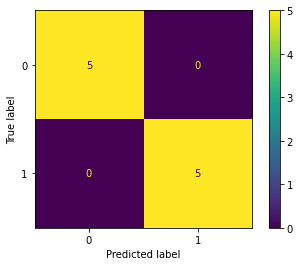

In [62]:
# Evaluasi model lemmatizer pada data test

y_pred_inf = model_predict.predict(X_inf_lem)
y_pred_inf = np.where(y_pred_inf >=0.5, 1, 0)

cm_inf_lemm = confusion_matrix(y_inf,y_pred_inf)

print(classification_report(y_inf, y_pred_inf))
ConfusionMatrixDisplay(cm_inf_lemm).plot()

Model mampu melakukan prediksi pada data inferens. Dan menghasilkan prediksi 100%. Selanjutnya penulis akan menarik kesimpulan dari project ini.

# 11. Kesimpulan

Dari hasil EDA dapat disimpulkan bahwa berita palsu umumnya memiliki jumlah kata lebih banyak, terdapat link ke website lain dan mention akun twitter untuk narasumber, Jumlah kata berita kurang lebih 800 kata.

Semua berita umumnya membicarakan mengenai Presiden Donald Trump dan Amerika Serikat. Berita asli rata-rata memiliki sumber dari media Reuters

Preprocessing menghasilkan beberapa poin yang harus dibersihkan, link berita, mention twitter(hashtag dan mention),sisanya untuk antisipasi, dan stopwords ditambah U dan S karena banyak penulisan U.S. yang akan menghasilkan huruf u s yang menurut penulis tidak terlalu relevan.

Untuk modelling dihasilkan model yang sangat bagus yaitu mampu memprediksi dengan akurasi 98%. 

Model tersebut telah dilakukan improvisasi yang tadinya exploding gradient, ditambahkan Kernel Stabilizer l2 (dikarenakan l1 malah memotong akurasi hingga menjadi 50%) model sudah dicoba ditambah hidden layer LSTM tambahan dan ditambah nodenya namun tidak signifikan kenaikannya.

Model ini sudah mampu memprediksi berita palsu dengan baik sehingga pemerintahan amerika serikat bisa melakukan filtering berita palsu dengan error rate 2%.

Untuk peningkatan model personal judgement dari penulis adalah meningkatkan preprocessing nya, karena belum terlalu banyak artikel yang penulis liat setelah preprocessing bisa saja masi banyak kata yang harus dimasukan ke stopwords atau menambahkan kata-kata untuk lemmatizer sehingga model vocabnya bisa diperkecil, semakin kecil vocabulary nya semakin ringan model namun belum tentu akurasi meningkat. Oleh karena itu harus ditingkatkan lagi dalam proses pre-processing.
